   Actual  Predicted
0      10       6.28
1      12      11.33
2       5       3.03
3      10       8.04
4       9       8.56
5      13      12.37
6      18      18.68
7       6       7.54
8       0       6.99
9      14      12.36
Mean Absolute Error: 1.5
R² Score: 0.75


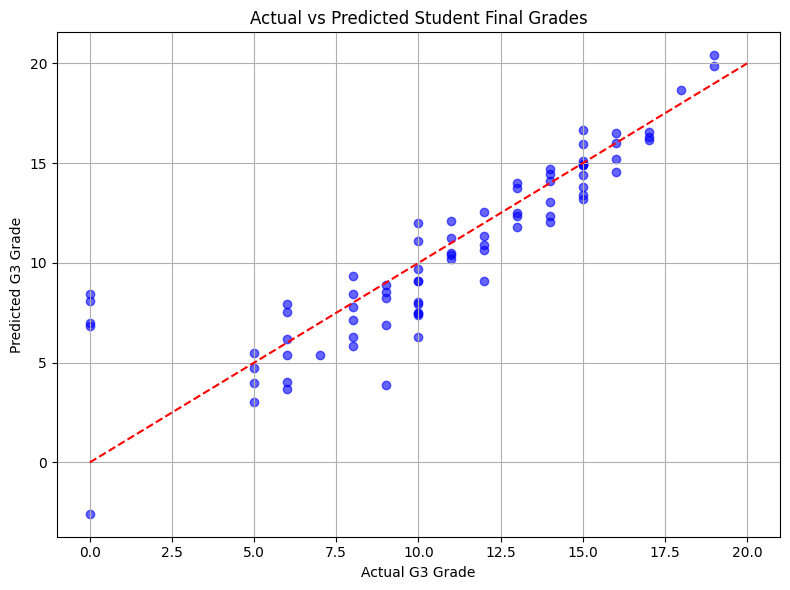

In [31]:
# Student Performance Prediction
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('data/student-mat.csv', sep=';')
data = df.copy()
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

X = data.drop('G3', axis=1)
y = data['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred.round(2)
})

print(comparison.head(10))

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", round(mae, 2))
print("R² Score:", round(r2, 2))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.xlabel('Actual G3 Grade')
plt.ylabel('Predicted G3 Grade')
plt.title('Actual vs Predicted Student Final Grades')
plt.grid(True)
plt.tight_layout()
plt.show()
